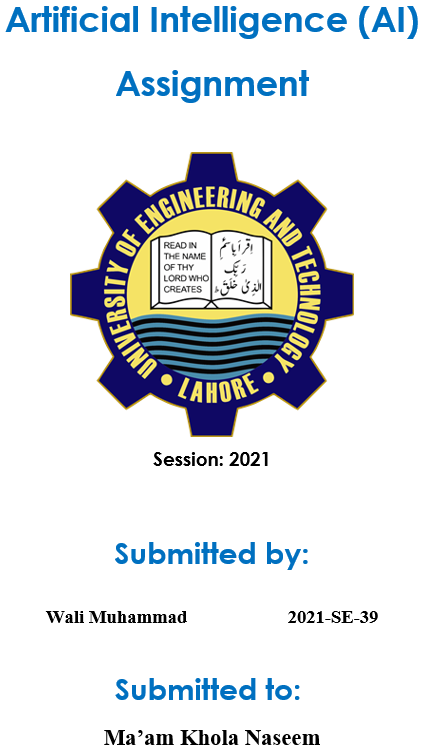

## Question 1

Implement 8 Queen Problem in python using Genetic algorithm. Use initial population of 4 
chromosomes in which genes will be added using the random function. Implement all step of genetic 
algorithm to complete this task. Termination criteria will be when at least 3 offspring should have fitness value equal or greater than 27 and you are supposed to print the value of these offsprings. Fitness function will be based on number of non-attacking queens.

## Implementation

In [34]:
import random

def random_chromosome(size):  # making random chromosomes
    return [random.randint(1, nq) for _ in range(nq)]

def fitness(chromosome):
    horizontal_collisions = sum([chromosome.count(queen) - 1 for queen in chromosome]) / 2
    diagonal_collisions = 0

    n = len(chromosome)
    # finding left and right side collosions
    left_diagonal = [0] * 2 * n
    right_diagonal = [0] * 2 * n
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    # findin diagonal collions
    diagonal_collisions = 0
    for i in range(2 * n - 1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i] - 1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i] - 1
        diagonal_collisions += counter / (n - abs(i - n + 1))

    return int(maxFitness - (horizontal_collisions + diagonal_collisions))  # 28-(2+3)=23

def probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness

def roulette_wheel_selection(population, probabilities):
    total = sum(probabilities)
    r = random.uniform(0, total)
    cumulative_probability = 0
    for i, p in enumerate(probabilities):
        cumulative_probability += p
        if cumulative_probability >= r:
            return population[i]   # will return the best chromosome
    assert False, "Shouldn't get here"

def reproduce(x, y):
    n = len(x)
    c = random.randint(0, n - 1)
    return x[0:c] + y[c:n]

def mutate(x):
    n = len(x)
    c = random.randint(0, n - 1)
    m = random.randint(1, n)
    x[c] = m
    return x

def genetic_queen(population, fitness):
    mutation_probability = 0.03
    new_population = []
    probabilities = [probability(n, fitness) for n in population]
    for i in range(len(population)):
        x = roulette_wheel_selection(population, probabilities)  # best chromosome 1 returened
        y = roulette_wheel_selection(population, probabilities)  # best chromosome 2
        child = reproduce(x, y)  # creating two new chromosomes from the best 2 chromosomes
        if random.random() < mutation_probability:
            child = mutate(child)
        new_population.append(child)
        if fitness(child) == maxFitness:
            break
    return new_population

def print_chromosome(chrom):
    print("Chromosome = {},  Fitness = {}".format(str(chrom), fitness(chrom)))

def print_generation(generation, population):
    print("=== Generation {} ===".format(generation))
    for i, chrom in enumerate(population):
        print("Chromosome {}: {},  Fitness = {}".format(i + 1, str(chrom), fitness(chrom)))
    print("")

if __name__ == "__main__":
    nq = 8
    maxFitness = (nq * (nq - 1)) / 2
    population = [random_chromosome(nq) for _ in range(4)]

    generation = 1

    # Print the initial generation
    print_generation("The initial generation say Generation 0", population)

    while True:
        population = genetic_queen(population, fitness)
        print_generation(generation, population)

        # Check for termination criteria
        offspring_fitness = [fitness(child) for child in population]
        if any(fit >= 27 for fit in offspring_fitness):
            # Check if three offspring have fitness greater than or equal to 27
            count_above_27 = sum(1 for fit in offspring_fitness if fit >= 27)
            if count_above_27 >= 3:
                print("Termination criteria met! {} offspring have fitness greater than or equal to 27".format(count_above_27))
                break

        generation += 1

    chrom_out = []
    print("Solved in Generation {}!".format(generation))
    for i, chrom in enumerate(population):
        print("Chromosome {}: {},  Fitness = {}".format(i + 1, str(chrom), fitness(chrom)))
    print("")

=== Generation The initial generation say Generation 0 ===
Chromosome 1: [8, 3, 7, 7, 5, 4, 2, 3],  Fitness = 25
Chromosome 2: [6, 5, 1, 8, 1, 5, 7, 5],  Fitness = 23
Chromosome 3: [8, 8, 4, 4, 6, 5, 2, 2],  Fitness = 24
Chromosome 4: [4, 6, 1, 2, 5, 1, 4, 1],  Fitness = 23

=== Generation 1 ===
Chromosome 1: [8, 8, 4, 4, 6, 5, 2, 3],  Fitness = 25
Chromosome 2: [6, 5, 1, 8, 1, 5, 7, 5],  Fitness = 23
Chromosome 3: [8, 3, 7, 7, 5, 4, 2, 5],  Fitness = 25
Chromosome 4: [8, 3, 7, 7, 5, 4, 7, 5],  Fitness = 23

=== Generation 2 ===
Chromosome 1: [8, 8, 4, 4, 6, 5, 2, 3],  Fitness = 25
Chromosome 2: [6, 5, 1, 7, 5, 4, 2, 5],  Fitness = 24
Chromosome 3: [8, 5, 1, 8, 1, 5, 7, 5],  Fitness = 23
Chromosome 4: [8, 3, 4, 4, 6, 5, 2, 3],  Fitness = 24

=== Generation 3 ===
Chromosome 1: [8, 3, 4, 4, 6, 5, 2, 3],  Fitness = 24
Chromosome 2: [6, 1, 1, 7, 5, 4, 2, 5],  Fitness = 25
Chromosome 3: [8, 3, 4, 4, 6, 5, 2, 3],  Fitness = 24
Chromosome 4: [8, 5, 1, 8, 1, 5, 7, 5],  Fitness = 23

=== Genera

=== Generation 1093 ===
Chromosome 1: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 2: [3, 2, 2, 2, 7, 7, 7, 5],  Fitness = 21
Chromosome 3: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 4: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23

=== Generation 1094 ===
Chromosome 1: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 2: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 3: [3, 2, 2, 2, 7, 7, 7, 5],  Fitness = 21
Chromosome 4: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23

=== Generation 1095 ===
Chromosome 1: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 2: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 3: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 4: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23

=== Generation 1096 ===
Chromosome 1: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 2: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 3: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23
Chromosome 4: [3, 2, 2, 2, 6, 7, 7, 5],  Fitness = 23

=== Generation 1097 ===
Chromosome 1

## Question 2

Data Set: Please use the following data set for your project. 
https://archive.ics.uci.edu/ml/datasets/iris
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
You are required to implement the __K-Means__ on the above given data set. Your result will 
be the clusters, after applying the K Means .Visualize the result. 

#### Input:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

#### Output:
Predicted attribute: class of iris plant

## Implementation

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


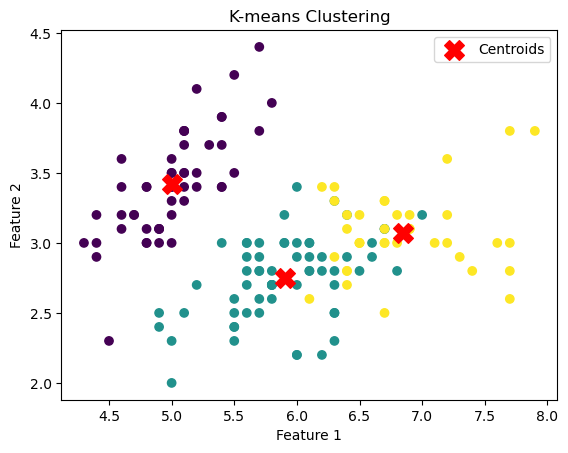

Predicted Cluster for Inputed Data: [0]
Predicted Class for Inputed Data: ['Iris-setosa']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Load the iris dataset using pandas
file_path = r'C:\Users\walim\Documents\Projects\Python\AI\iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(file_path, header=None, names=column_names)

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df['class'] # y are labels (classes)

# Convert class labels to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Create KMeans model and fit the data
k = 3
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Predict the cluster for new data
new_data = np.array([[4.9, 3.1, 1.5, 0.2]])  # Convert the list to a Numpy array
predicted_cluster = kmeans.predict(new_data)
print(f"Predicted Cluster for Inputed Data: {predicted_cluster}")
predicted_class = le.inverse_transform(predicted_cluster)
print(f"Predicted Class for Inputed Data: {predicted_class}")

## Question 3

Data Set: Please use the following data set for your project. 
https://archive.ics.uci.edu/ml/datasets/iris
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
Apply __Naïve Bayes Theorem__. When an input will be given different from the one used in the data set, 
your code will be predicting about the type of class to which it belongs.

#### Input:
1. Sepal length in cm
4.9
2. Sepal width in cm
3.1
3. Petal length in cm
1.5
4. Petal width in cm
0.2

#### Output:
It belongs to "Iris-setosa"

## Implementation

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Load the iris dataset
X = np.loadtxt(r'C:\Users\walim\Documents\Projects\Python\AI\iris.data', delimiter=',', usecols=(0, 1, 2, 3))
y = np.loadtxt(r'C:\Users\walim\Documents\Projects\Python\AI\iris.data', delimiter=',', usecols=(4), dtype=str)

# y is used to show label data
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

accuracy_train = gnb.score(X_train, y_train)
print("Trainig Accuracy:",accuracy_train)

accuracy_test = gnb.score(X_test, y_test)
print("Testing Accuracy:",accuracy_test)

new_data = [[4.9, 3.1, 1.5, 0.2]]
prediction = gnb.predict(new_data)
print("Predicted Class",prediction)

print("It belongs to ",le.inverse_transform(gnb.predict(new_data)))

Trainig Accuracy 0.95
Testing Accuracy 1.0
Predicted Class [0]
It belongs to  ['Iris-setosa']
